In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from math import sqrt

C:\Users\kprab\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Data Collection

In [2]:
#loading the data from csv file to a Panda Dataframe
calories_data=pd.read_csv('calories.csv')

In [3]:
#print the first 5 rows of the dataframe
calories_data.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
exercise_data=pd.read_csv('exercise.csv')

In [5]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining the calories & exercise Dataframe

In [6]:
Merged_data_frame=pd.concat([exercise_data,calories_data['Calories']],axis=1)

In [7]:
Merged_data_frame.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [8]:
#Checking the number of rows and columns in our Dataframe
Merged_data_frame.shape

(15000, 9)

In [9]:
#getting some information about the data
Merged_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [10]:
#checking for missing values
Merged_data_frame.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Data Analysis

In [11]:
#Get some statistical measures about the data
Merged_data_frame.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization of some features

C:\Users\kprab\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

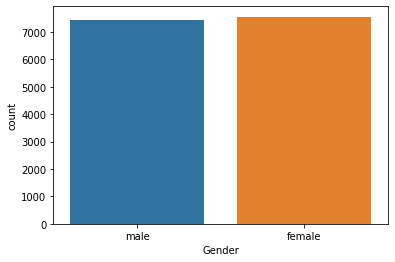

In [12]:
#Plotting the gender column in count plot
sns.countplot(Merged_data_frame['Gender'])

C:\Users\kprab\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

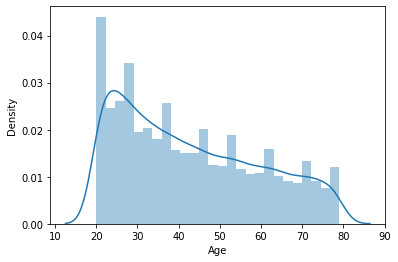

In [13]:
#Distibution 'Age' column
sns.distplot(Merged_data_frame['Age'])

C:\Users\kprab\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

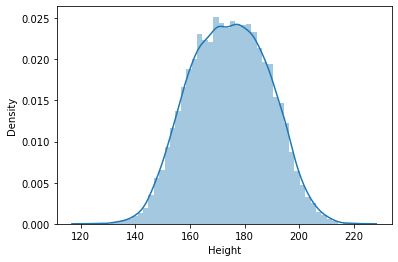

In [14]:
#Distribution of 'Height' Column
sns.distplot(Merged_data_frame['Height'])

C:\Users\kprab\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

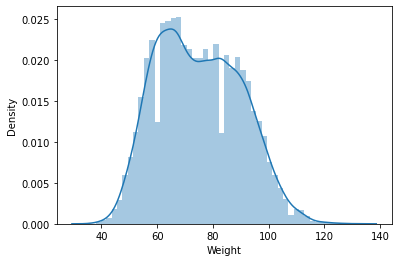

In [15]:
#Distribution of 'Weight' Column
sns.distplot(Merged_data_frame['Weight'])

C:\Users\kprab\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Duration', ylabel='Density'>

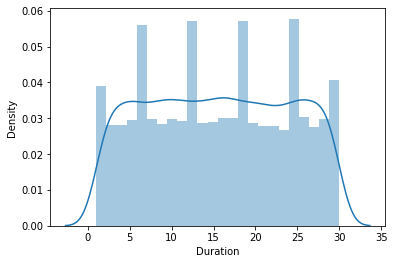

In [16]:
#Distribution of 'Duration' Column
sns.distplot(Merged_data_frame['Duration'])

C:\Users\kprab\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Heart_Rate', ylabel='Density'>

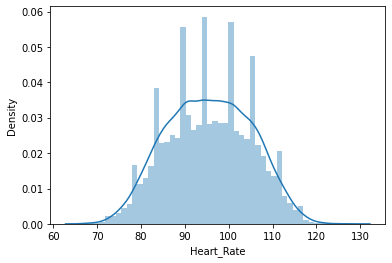

In [17]:
#Distribution of 'Heart Rate' Column
sns.distplot(Merged_data_frame['Heart_Rate'])

C:\Users\kprab\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Body_Temp', ylabel='Density'>

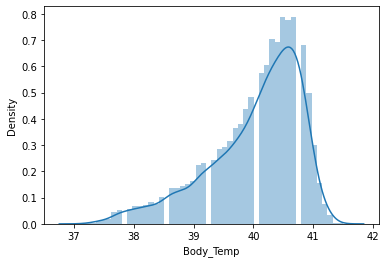

In [18]:
#Distribution of 'Body Temperature' Column
sns.distplot(Merged_data_frame['Body_Temp'])

C:\Users\kprab\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height', ylabel='Calories'>

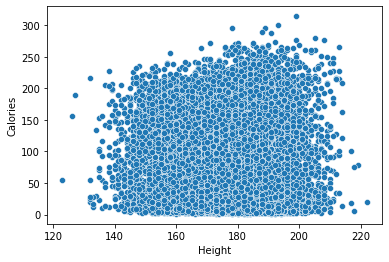

In [19]:
sns.scatterplot(Merged_data_frame['Height'],Merged_data_frame['Calories'])

C:\Users\kprab\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight', ylabel='Calories'>

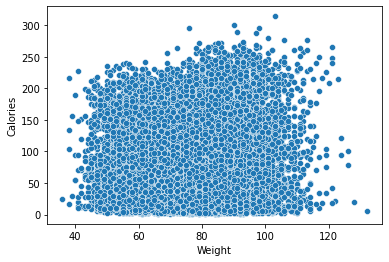

In [20]:
sns.scatterplot(Merged_data_frame['Weight'],Merged_data_frame['Calories'])

Finding the Correlation in the dataset        

In [21]:
correlation=Merged_data_frame.corr()

<AxesSubplot:>

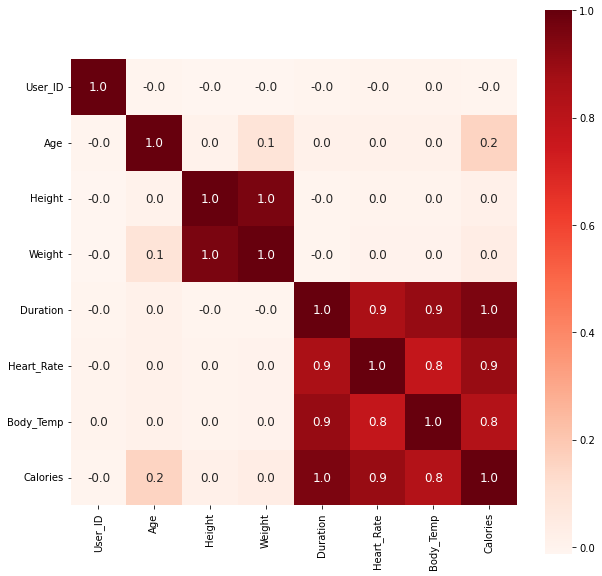

In [22]:
#Constructing a heatmap for better understanding of correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'fontsize':12},cmap='Reds') 

Converting the text data 'Gender' to numerical value 0,1

In [23]:
Merged_data_frame.replace({"Gender":{'male':0,'female':1}},inplace=True)

In [24]:
Merged_data_frame.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Separating features and Target

In [25]:
X=Merged_data_frame.drop(columns=['User_ID','Calories'],axis=1)
Y=Merged_data_frame['Calories']

In [26]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [27]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


Splitting the merged_data into train and test data

In [28]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


XGBoost Regressor

In [30]:
#Loading the model
Model=XGBRegressor()

In [31]:
#Training the Model
Model.fit(X_train,Y_train)

C:\Users\kprab\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

Finding prediction values on Test Data

In [32]:
Test_data_prediction=Model.predict(X_test)

In [33]:
print(Test_data_prediction)

[172.21268  192.5936    51.877926 ... 119.1775    19.32563  217.1421  ]


Mean Absolute Error

In [34]:
Mae=metrics.mean_absolute_error(Y_test,Test_data_prediction)

In [35]:
print("Mean Absolute Error = ",Mae)

Mean Absolute Error =  1.5139621509313583


Root Mean Square Error  and R squared score

In [36]:
Mse=metrics.mean_squared_error(Y_test,Test_data_prediction)
Rmse=sqrt(Mse)
r2=r2_score(Y_test,Test_data_prediction)

In [37]:
print(f'Model = XGBoost Regressor, RMSE={Rmse:.3f}, R2={r2:.3f}')

Model = XGBoost Regressor, RMSE=2.234, R2=0.999


In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [39]:
Merged_data_frame.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [40]:
X_train1,X_test1,Y_train1,Y_test1=train_test_split(Merged_data_frame.drop(columns=['User_ID','Calories'],axis=1),Merged_data_frame.Calories.values,test_size=0.2,random_state=42)

In [41]:
print(X_train1.shape,X_test1.shape)
print(Y_train1.shape,Y_test1.shape)

(12000, 7) (3000, 7)
(12000,) (3000,)


Linear Regression Model

In [42]:
lr = LinearRegression()
lr.fit(X_train1,Y_train1)
Test_data_prediction1=lr.predict(X_test1)
Rmse1=np.sqrt(metrics.mean_squared_error(Y_test1,Test_data_prediction1))
r2=r2_score(Y_test1,Test_data_prediction1)

In [43]:
print(f'Model=LinearRegression, RMSE={Rmse1:.3f}, R2={r2:.3f}')

Model=LinearRegression, RMSE=11.489, R2=0.967


Decision tree model

In [44]:
dt= DecisionTreeRegressor(random_state=42)
dt.fit(X_train1,Y_train1)
Test_data_prediction2= dt.predict(X_test1)
Rmse2= np.sqrt(metrics.mean_squared_error(Y_test1,Test_data_prediction2))
r2 = r2_score(Y_test1,Test_data_prediction2)

In [45]:
print(f'Model=DecisionTree, RMSE={Rmse2:.3f}, R2={r2:.3f}')

Model=DecisionTree, RMSE=5.316, R2=0.993


Random Forest Regressor

In [46]:
rf = RandomForestRegressor(n_estimators=30, random_state=42)
rf.fit(X_train1, Y_train1)
Test_data_prediction3= rf.predict(X_test1)
Rmse3 = np.sqrt(metrics.mean_squared_error(Y_test1, Test_data_prediction3))
r2 = r2_score(Y_test1, Test_data_prediction3)

In [47]:
print(f'Model=RandomForest, RMSE={Rmse3:.3f}, R2={r2:.3f}')

Model=RandomForest, RMSE=2.740, R2=0.998


BUILDING A PREDICTIVE SYSTEM

In [48]:
input_data = (0,68,190.0,94.0,29.0,105.0,40.8)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = Model.predict(input_data_reshaped)
print(prediction)


[231.97958]
